In [2]:
# These are the dependencies required for creating an environment
!apt install cmake libopenmpi-dev zlib1g-dev
!pip install stable-baselines==2.2.0
!apt-get install python-opengl


Reading package lists... Done
Building dependency tree       
Reading state information... Done
cmake is already the newest version (3.10.2-1ubuntu2).
zlib1g-dev is already the newest version (1:1.2.11.dfsg-0ubuntu2).
libopenmpi-dev is already the newest version (2.1.1-8).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-opengl is already the newest version (3.1.0+dfsg-1).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.


In [3]:
# Create and wrap the environment
from stable_baselines.common.atari_wrappers import make_atari
from stable_baselines.deepq.policies import MlpPolicy, CnnPolicy
from stable_baselines import DQN

# Make ChopperCommand Environment
env = make_atari('ChopperCommandNoFrameskip-v4')
# using the Deep-Q Learning with CNN Policy 
model = DQN(CnnPolicy, env, verbose=1)
# Train the agent
model.learn(total_timesteps=10000)

/usr/local/lib/python3.6/dist-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


# Testing on Chopper Command Environment

In [9]:
R=0
frames=[]
plot_rewards=[]
obs = env.reset() #initializing STATE
for episode in range(0,2000):
    action, _states = model.predict(obs) #feeding state to model to predict next state and action
    obs, rewards, dones, info = env.step(action) #getting game data
    R+=rewards #summing rewards for episode
    if (dones): # episode over
      print('Last Episode Reward: {}'.format(R))
      R= 0
      plot_rewards.append(R)
      obs=env.reset() #starting game again
    fig=env.render(mode = 'rgb_array') # rendering env
    frames.append(fig)
print(plot_rewards)

Last Episode Reward: 500.0
Last Episode Reward: 1000.0
Last Episode Reward: 1500.0
Last Episode Reward: 2000.0
Last Episode Reward: 2600.0
Last Episode Reward: 3100.0
[500.0, 1000.0, 1500.0, 2000.0, 2600.0, 3100.0]


In [10]:
"""

To create animation, you need to install ffmpeg
These lines will install it in Google Colab
If you're running this notebook locally, you'll need to install
ffmpeg on your computer: 
https://github.com/adaptlearning/adapt_authoring/wiki/Installing-FFmpeg

"""
!apt install ffmpeg
!which ffmpeg
import matplotlib
#matplotlib.use("Agg")
import matplotlib.pyplot as plt
from matplotlib.image import imread
from matplotlib import rc, animation
from IPython import display
from IPython.display import HTML
%matplotlib inline
plt.rcParams['animation.ffmpeg_path'] = u'/usr/bin/ffmpeg'

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.4-0ubuntu0.18.04.1).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.
/usr/bin/ffmpeg


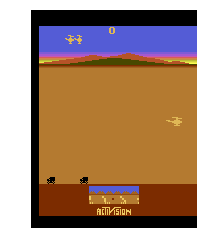

In [11]:
# Saving Animation
fig, ax = plt.subplots()
plt.axis('off')
l = ax.imshow(frames[0])

def animate(i):
    l.set_data(frames[i])

Writer = animation.writers['ffmpeg']
writer = Writer(fps=12, metadata=dict(artist='Me'))
ani = animation.FuncAnimation(fig, animate, frames=len(frames))

ani.save('chopper.mp4', writer=writer, dpi=220)

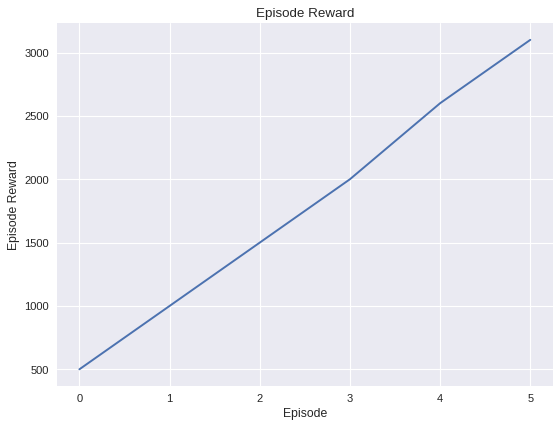

In [12]:
# Plotting rewards graph
import numpy as np
plt.figure(figsize=(8, 6), dpi=80)
plt.title("Episode Reward")
plt.xlabel("Episode")
plt.ylabel("Episode Reward")
plt.plot(plot_rewards)

In [0]:
try:
  from google.colab import files
except:
  print("Could not import Google Colab.")
  
files.download('chopper.mp4')